In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
test_df = pd.read_csv("data/test_new.csv")
# Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# Drop the null rows
test_df = test_df.dropna()
test_df = test_df.drop(columns = ['Date of Joining'])

test_df.count()

Gender                  12250
Company Type            12250
WFH Setup Available     12250
Designation             12250
Resource Allocation     12250
Mental Fatigue Score    12250
dtype: int64

In [3]:
test_df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,1,0,0,2.0,5.0,7.7
1,1,1,1,1.0,2.0,5.2
2,0,1,1,1.0,3.0,5.9
3,1,0,0,3.0,6.0,4.6
4,1,1,0,2.0,5.0,6.4


In [4]:
selected_features = test_df.drop(columns = ['Gender'])

selected_features

,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,0,0,2.0,5.0,7.7
1,1,1,1.0,2.0,5.2
2,1,1,1.0,3.0,5.9
3,0,0,3.0,6.0,4.6
4,1,0,2.0,5.0,6.4
...,...,...,...,...,...
12245,0,1,1.0,2.0,6.1
12246,1,1,2.0,4.0,5.9
12247,0,0,4.0,7.0,9.6
12248,0,0,3.0,6.0,6.7


In [5]:
#split train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, test_df['Gender'], random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.668/0.521
k: 3, Train/Test Score: 0.681/0.526
k: 5, Train/Test Score: 0.670/0.541
k: 7, Train/Test Score: 0.656/0.546
k: 9, Train/Test Score: 0.648/0.550
k: 11, Train/Test Score: 0.637/0.553
k: 13, Train/Test Score: 0.633/0.555
k: 15, Train/Test Score: 0.628/0.554
k: 17, Train/Test Score: 0.623/0.559
k: 19, Train/Test Score: 0.619/0.563
k: 21, Train/Test Score: 0.619/0.565
k: 23, Train/Test Score: 0.614/0.563
k: 25, Train/Test Score: 0.608/0.561
k: 27, Train/Test Score: 0.606/0.570
k: 29, Train/Test Score: 0.603/0.563


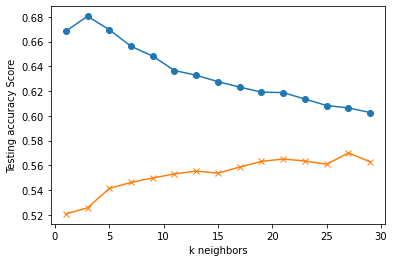

In [8]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o')
plt.plot(range(1, 30, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()